In [1]:
# ===============================
# Librairies
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA

import tensorflow as tf
from keras import layers, models, callbacks, optimizers, losses, metrics

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
# ===============================
# Load a real time series
# ===============================
def load_data_from_csv(filepath):
    # Load CSV without header
    df = pd.read_csv(filepath, header=None)
    # Combine first two rows into a single header
    header1 = df.iloc[0].fillna("")  # market symbols
    header2 = df.iloc[1].fillna("")  # OHLCV etc
    # Create new column names
    new_header = []
    for h1, h2 in zip(header1, header2):
        if h1 != "":
            new_header.append(f"{h1}_{h2}" if h2 != "" else h1)
        else:
            new_header.append(h2)
    # Drop first two rows from the data
    df = df[2:]
    df.columns = new_header
    df = df.reset_index(drop=True)
    # Optional: remove fully empty columns
    df = df.dropna(axis=1, how='all')
    return df

df_load = load_data_from_csv("../data/Stock_Market_Initial_Data.csv")
df_load

/var/folders/8j/y46wyjvx641clg_t_cq0ggfc0000gn/T/ipykernel_1708/4198978970.py:6: DtypeWarning: Columns (1,2,3,4,5,6,8,9,10,11,12,13,15,16,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34,36,37,38,39,40,41,43,44,45,46,47,48,50,51,52,53,54,55,57,58,59,60,61,62,64,65,66,67,68,69,71,72,73,74,75,76,78,79,80,81,82,83,85,86,87,88,89,90,92,93,94,95,96,97,99,100,101,102,103,104,106,107,108,109,110,111,113,114,115,116,117,118,120,121,122,123,124,125,127,128,129,130,131,132,134,135,136,137,138,139,141,142,143,144,145,146,148,149,150,151,152,153,155,156,157,158,159,160,162,163,164,165,166,167,169,170,171,172,173,174,176,177,178,179,180,181,183,184,185,186,187,188,190,191,192,193,194,195,197,198,199,200,201,202,204,205,206,207,208,209,211,212,213,214,215,216,218,219,220,221,222,223,225,226,227,228,229,230) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, header=None)


,Date,^GSPC_High,Low,Open,Close,Volume,Adj Close,^IXIC_High,Low,Open,...,Open,Close,Volume,Adj Close,^JN0U.JO_High,Low,Open,Close,Volume,Adj Close
0,12/31/1996,753.9500122,740.7399902,753.8499756,740.7399902,399760000,740.7399902,1291.880005,1285.449951,1289.23999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/2/1997,742.8099976,729.5499878,740.7399902,737.0100098,463230000,737.0100098,1293.630005,1272.339966,1292.650024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/3/1997,748.2399902,737.0100098,737.0100098,748.0300293,452970000,748.0300293,1310.839966,1280.699951,1288.02002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/6/1997,753.3099976,743.8200073,748.0300293,747.6500244,531350000,747.6500244,1321.469971,1310.630005,1314.339966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/7/1997,753.2600098,742.1799927,747.6500244,753.2299805,538220000,753.2299805,1327.819946,1312.079956,1316.910034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6504,11/2/2022,3894.439941,3758.679932,3852.899902,3759.689941,4899000000,3759.689941,10993.24023,10522.90039,10885.00977,...,NaN,NaN,NaN,NaN,3640.830078,3566.639893,3602.090088,3573.790039,0.0,3573.790039
6505,11/3/2022,3750.590088,3698.149902,3733.25,3719.889893,4625290000,3719.889893,10486.00977,10319.54004,10399.4502,...,NaN,NaN,NaN,NaN,3557.22998,3431.080078,3557.0,3474.129883,0.0,3474.129883
6506,11/4/2022,3796.340088,3708.840088,3766.97998,3770.550049,0,3770.550049,10553.62988,10262.92969,10548.13965,...,NaN,NaN,NaN,NaN,3765.290039,3497.070068,3498.77002,3751.629883,0.0,3751.629883
6507,11/7/2022,3813.949951,3764.699951,3780.709961,3806.800049,4341620000,3806.800049,10587.95996,10428.91016,10516.94043,...,NaN,NaN,NaN,NaN,3826.070068,3695.27002,3749.379883,3815.75,0.0,3815.75


In [3]:
# ===============================
# Function to extract market data for a specific index from the CSV file
# ===============================
def extract_market_data(df, market_name):
    """
    Extract Date + OHLCV columns for a given market
    """
    df.columns = df.columns.str.strip()
    high_col_candidates = [c for c in df.columns if c.startswith(f"{market_name}_High")]
    if not high_col_candidates:
        raise ValueError(f"Column starting with {market_name}_High not found.")
    
    high_col = high_col_candidates[0]
    high_idx = df.columns.get_loc(high_col)
    
    # Date + next 6 columns (High, Low, Open, Close, Volume, Adj Close)
    cols_idx = [0] + list(range(high_idx, high_idx + 6))
    df_market = df.iloc[:, cols_idx].copy()
    df_market = df_market.reset_index(drop=True)
    
    # Rename columns for clarity
    df_market.columns = ["Date", "High", "Low", "Open", "Close", "Volume", "Adj Close"]
    df_market[["High", "Low", "Open", "Close", "Volume", "Adj Close"]] = df_market[["High", "Low", "Open", "Close", "Volume", "Adj Close"]].astype(float)
    return df_market

# Example for ^GSPC
df_gspc = extract_market_data(df_load, "^GSPC")
df_gspc

,Date,High,Low,Open,Close,Volume,Adj Close
0,12/31/1996,753.950012,740.739990,753.849976,740.739990,3.997600e+08,740.739990
1,1/2/1997,742.809998,729.549988,740.739990,737.010010,4.632300e+08,737.010010
2,1/3/1997,748.239990,737.010010,737.010010,748.030029,4.529700e+08,748.030029
3,1/6/1997,753.309998,743.820007,748.030029,747.650024,5.313500e+08,747.650024
4,1/7/1997,753.260010,742.179993,747.650024,753.229981,5.382200e+08,753.229981
...,...,...,...,...,...,...,...
6504,11/2/2022,3894.439941,3758.679932,3852.899902,3759.689941,4.899000e+09,3759.689941
6505,11/3/2022,3750.590088,3698.149902,3733.250000,3719.889893,4.625290e+09,3719.889893
6506,11/4/2022,3796.340088,3708.840088,3766.979980,3770.550049,0.000000e+00,3770.550049
6507,11/7/2022,3813.949951,3764.699951,3780.709961,3806.800049,4.341620e+09,3806.800049


In [4]:
# ===============================
# Preprocess the data to add additional informations
# ===============================
def preprocess_data(df):
    """
    Full preprocessing for OHLCV financial data
    Adds trend, momentum, volatility, OHLC-based, volume, and temporal features
    """

    # 1. Temporal features (not useful for stock market datas)
    # dates = pd.to_datetime(df['Date'])
    # df['DayOfYear'] = dates.dt.dayofyear
    # df['Month'] = dates.dt.month
    # df['Sin_Day'] = np.sin(2 * np.pi * df['DayOfYear'] / 365)
    # df['Cos_Day'] = np.cos(2 * np.pi * df['DayOfYear'] / 365)
    # df['Sin_Month'] = np.sin(2 * np.pi * df['Month'] / 12)
    # df['Cos_Month'] = np.cos(2 * np.pi * df['Month'] / 12)

    # 2. Price-based indicators
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

    # Momentum / Returns
    df['Daily_Return'] = df['Close'].pct_change()
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Momentum_4'] = df['Close'] - df['Close'].shift(4)
    df['Momentum_10'] = df['Close'] - df['Close'].shift(10)

    # Relative Strength / Momentum indicators
    delta = df['Close'].diff(1)
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(14).mean()
    rs = gain / loss
    df['RSI_14'] = 100 - (100 / (1 + rs))

    low14 = df['Close'].rolling(14).min()
    high14 = df['Close'].rolling(14).max()
    df['Stochastic_K'] = 100 * (df['Close'] - low14) / (high14 - low14)
    df['Stochastic_D'] = df['Stochastic_K'].rolling(3).mean()

    # Volatility indicators
    df['Volatility_10'] = df['Close'].rolling(10).std()
    df['Volatility_20'] = df['Close'].rolling(20).std()
    # df['ATR_14'] = df['High'].combine(df['Close'].shift(1), max) - df['Low'].combine(df['Close'].shift(1), min)
    # df['ATR_14'] = df['ATR_14'].rolling(14).mean()
    # df['Price_Range'] = df['High'] - df['Low']

    # MACD
    exp12 = df['Close'].ewm(span=12, adjust=False).mean()
    exp26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp12 - exp26
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    # Bollinger Bands
    df['Middle_Band'] = df['Close'].rolling(20).mean()
    df['Upper_Band'] = df['Middle_Band'] + (df['Close'].rolling(20).std() * 2)
    df['Lower_Band'] = df['Middle_Band'] - (df['Close'].rolling(20).std() * 2)
    df['BB_%B'] = (df['Close'] - df['Lower_Band']) / (df['Upper_Band'] - df['Lower_Band'])
    
    # OHLC-based features
    # df['Typical_Price'] = (df['High'] + df['Low'] + df['Close']) / 3
    # df['Candle_Body'] = df['Close'] - df['Open']
    # df['Upper_Shadow'] = df['High'] - df[['Close', 'Open']].max(axis=1)
    # df['Lower_Shadow'] = df[['Close', 'Open']].min(axis=1) - df['Low']
    # df['Gap'] = df['Open'] - df['Close'].shift(1)
    # df['HL_Ratio'] = df['High'] / df['Low']
    # df['CO_Ratio'] = df['Close'] / df['Open']
    
    # Volume-based features
    # df['Volume_SMA_20'] = df['Volume'].rolling(20).mean()
    # df['Volume_SMA_50'] = df['Volume'].rolling(50).mean()
    # df['Volume_Change'] = df['Volume'].pct_change() # clip?? 
    # # Volume indicators
    # obv = [0]
    # for i in range(1, len(df)):
    #     if df['Close'][i] > df['Close'][i-1]:
    #         obv.append(obv[-1] + df['Volume'][i])
    #     elif df['Close'][i] < df['Close'][i-1]:
    #         obv.append(obv[-1] - df['Volume'][i])
    #     else:
    #         obv.append(obv[-1])
    # df['OBV'] = obv
    # df['VWAP'] = (df['Close'] * df['Volume']).cumsum() / df['Volume'].cumsum()
    
    # Drop NaNs created by rolling/shift
    df.dropna(inplace=True)
    
    return df

df = preprocess_data(df_gspc)
df

,Date,High,Low,Open,Close,Volume,Adj Close,SMA_50,SMA_200,EMA_20,...,Stochastic_K,Stochastic_D,Volatility_10,Volatility_20,MACD,MACD_Signal,Middle_Band,Upper_Band,Lower_Band,BB_%B
199,10/14/1997,972.859985,961.869995,968.099976,970.280029,5.103300e+08,970.280029,938.981000,852.581201,958.358095,...,71.599293,67.558816,7.584680,12.519041,10.407819,9.965106,958.145999,983.184082,933.107917,0.742311
200,10/15/1997,970.280029,962.750000,970.280029,965.719971,5.053100e+08,965.719971,939.247999,853.706101,959.059226,...,54.089675,64.155401,6.149449,12.096009,9.714567,9.914998,959.281998,983.474016,935.089979,0.633060
201,10/16/1997,973.380005,950.770019,965.719971,955.250000,5.970100e+08,955.250000,939.146599,854.797301,958.696443,...,22.237663,49.308877,7.156083,11.808195,8.225503,9.577099,959.679999,983.296388,936.063609,0.406209
202,10/17/1997,955.229981,931.580017,955.229981,944.159973,6.249800e+08,944.159973,939.005999,855.777951,957.312017,...,0.000000,25.442446,10.673954,12.148212,6.080444,8.877768,959.362497,983.658921,935.066073,0.187145
203,10/20/1997,955.719971,941.429993,944.159973,955.609985,4.838800e+08,955.609985,939.447399,856.817751,957.149919,...,29.389132,17.208932,11.036199,12.145212,5.243941,8.151003,959.371497,983.661920,935.081073,0.422572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6504,11/2/2022,3894.439941,3758.679932,3852.899902,3759.689941,4.899000e+09,3759.689941,3821.862212,4101.216359,3777.747117,...,55.542589,77.476430,69.817359,103.336907,14.836953,-5.819047,3730.511011,3937.184825,3523.837196,0.570592
6505,11/3/2022,3750.590088,3698.149902,3733.250000,3719.889893,4.625290e+09,3719.889893,3813.444609,4097.152009,3772.236905,...,22.998069,54.800620,58.575029,103.307929,7.799778,-3.095282,3729.279504,3935.895362,3522.663647,0.477278
6506,11/4/2022,3796.340088,3708.840088,3766.979980,3770.550049,0.000000e+00,3770.550049,3804.873208,4093.591110,3772.076252,...,44.529925,41.023528,56.693756,101.461170,6.238702,-1.228485,3735.824011,3938.746350,3532.901672,0.585565
6507,11/7/2022,3813.949951,3764.699951,3780.709961,3806.800049,4.341620e+09,3806.800049,3799.856011,4090.635410,3775.383280,...,59.937097,42.488364,56.400715,98.275890,7.836278,0.584467,3745.544519,3942.096299,3548.992739,0.655825


In [5]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'SMA_50',
       'SMA_200', 'EMA_20', 'EMA_50', 'Daily_Return', 'Log_Return',
       'Momentum_4', 'Momentum_10', 'RSI_14', 'Stochastic_K', 'Stochastic_D',
       'Volatility_10', 'Volatility_20', 'MACD', 'MACD_Signal', 'Middle_Band',
       'Upper_Band', 'Lower_Band', 'BB_%B'],
      dtype='object')

In [6]:
# ===============================
# Plotting different figures (optional)
# ===============================
"""
# Example: price and moving averages
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Close'], label='Close', color='blue')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50', color='orange')
plt.plot(df['Date'], df['SMA_200'], label='SMA 200', color='green')
plt.plot(df['Date'], df['EMA_20'], label='EMA 20', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price & Moving Averages')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Daily Returns & Log Returns
plt.figure(figsize=(16, 4))
plt.plot(df['Date'], df['Daily_Return'], label='Daily Return', color='purple')
plt.plot(df['Date'], df['Log_Return'], label='Log Return', color='brown')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Daily and Log Returns')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# RSI & Momentum
plt.figure(figsize=(16, 4))
plt.plot(df['Date'], df['RSI_14'], label='RSI 14', color='blue')
plt.plot(df['Date'], df['Momentum_4'], label='Momentum 4', color='orange')
plt.plot(df['Date'], df['Momentum_10'], label='Momentum 10', color='green')
plt.xlabel('Date')
plt.ylabel('Indicator Value')
plt.title('RSI & Momentum Indicators')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bollinger Bands
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Close'], label='Close', color='blue')
plt.plot(df['Date'], df['Middle_Band'], label='Middle Band', color='orange')
plt.plot(df['Date'], df['Upper_Band'], label='Upper Band', color='green')
plt.plot(df['Date'], df['Lower_Band'], label='Lower Band', color='red')
plt.fill_between(df['Date'], df['Lower_Band'], df['Upper_Band'], color='gray', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# # Volume & OBV
# plt.figure(figsize=(16, 4))
# plt.plot(df['Date'], df['Volume'], label='Volume', color='blue', alpha=0.5)
# plt.plot(df['Date'], df['OBV'], label='On-Balance Volume (OBV)', color='orange')
# plt.xlabel('Date')
# plt.ylabel('Volume')
# plt.title('Volume & OBV')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
"""

"\n# Example: price and moving averages\nplt.figure(figsize=(16, 6))\nplt.plot(df['Date'], df['Close'], label='Close', color='blue')\nplt.plot(df['Date'], df['SMA_50'], label='SMA 50', color='orange')\nplt.plot(df['Date'], df['SMA_200'], label='SMA 200', color='green')\nplt.plot(df['Date'], df['EMA_20'], label='EMA 20', color='red', linestyle='--')\nplt.xlabel('Date')\nplt.ylabel('Price')\nplt.title('Close Price & Moving Averages')\nplt.legend()\nplt.grid(True)\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n\n# Daily Returns & Log Returns\nplt.figure(figsize=(16, 4))\nplt.plot(df['Date'], df['Daily_Return'], label='Daily Return', color='purple')\nplt.plot(df['Date'], df['Log_Return'], label='Log Return', color='brown')\nplt.xlabel('Date')\nplt.ylabel('Returns')\nplt.title('Daily and Log Returns')\nplt.legend()\nplt.grid(True)\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n\n# RSI & Momentum\nplt.figure(figsize=(16, 4))\nplt.plot(df['Date'], df['RSI_14'], label='RS

In [7]:
# ===============================
# Drop unused columns and verify data consistency
# ===============================
df_ml = df.copy()

df_ml = df_ml.drop(columns=["Date", "Open", "High", "Low", "Volume", "Adj Close"], errors="ignore")   # Remove non-numeric column
df_ml = df_ml.select_dtypes(include=[np.number]).dropna()

In [8]:
df_ml.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Close,6310.0,1800.652282,932.659447,676.530029,1161.087555,1386.919983,2139.174927,4796.560059
SMA_50,6310.0,1789.730290,924.097034,788.956798,1144.508906,1379.013998,2116.683249,4681.011611
SMA_200,6310.0,1752.257996,890.892172,852.581201,1143.284848,1365.271801,2065.261064,4496.905588
EMA_20,6310.0,1796.403606,928.832691,743.372703,1157.973185,1385.079533,2138.139713,4720.631447
EMA_50,6310.0,1789.489094,922.821415,792.835619,1143.127564,1377.612689,2122.922503,4663.258078
Daily_Return,6310.0,0.000296,0.012493,-0.119841,-0.005043,0.000608,0.006094,0.115800
Log_Return,6310.0,0.000217,0.012514,-0.127652,-0.005056,0.000608,0.006076,0.109572
Momentum_4,6310.0,1.780079,44.624213,-496.100097,-15.274979,4.370056,21.447449,325.150146
Momentum_10,6310.0,4.512685,68.080100,-732.020019,-19.777527,9.439972,33.947571,426.280030
RSI_14,6310.0,54.478211,15.875957,4.009865,42.755398,54.745423,65.604112,99.298813


In [9]:
df_ml.isna().sum()

Close            0
SMA_50           0
SMA_200          0
EMA_20           0
EMA_50           0
Daily_Return     0
Log_Return       0
Momentum_4       0
Momentum_10      0
RSI_14           0
Stochastic_K     0
Stochastic_D     0
Volatility_10    0
Volatility_20    0
MACD             0
MACD_Signal      0
Middle_Band      0
Upper_Band       0
Lower_Band       0
BB_%B            0
dtype: int64

In [10]:
df_ml = df_ml.replace([np.inf, -np.inf], np.nan)
df_ml = df_ml.dropna()

In [11]:
df_ml.columns

Index(['Close', 'SMA_50', 'SMA_200', 'EMA_20', 'EMA_50', 'Daily_Return',
       'Log_Return', 'Momentum_4', 'Momentum_10', 'RSI_14', 'Stochastic_K',
       'Stochastic_D', 'Volatility_10', 'Volatility_20', 'MACD', 'MACD_Signal',
       'Middle_Band', 'Upper_Band', 'Lower_Band', 'BB_%B'],
      dtype='object')

In [12]:
# ===============================
# Keep historical data for later recursive forecast sequences recalculations
# ===============================
df_raw_hist = df_gspc[['Close']].copy()
df_raw_hist = df_raw_hist.select_dtypes(include=[np.number]).dropna()
df_raw_hist = df_raw_hist.replace([np.inf, -np.inf], np.nan)
df_raw_hist = df_raw_hist.dropna()
df_raw_hist.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Close,6310.0,1800.652282,932.659447,676.530029,1161.087555,1386.919983,2139.174927,4796.560059


In [13]:
# ===============================
# Scale price datas not to cause imbalance into the model
# ===============================
# 1. Volume columns
# no need now 

# 2. Price columns
price_cols = [
    # "High", "Low", "Open", "Adj Close",
    "SMA_50", "SMA_200", "EMA_20", "EMA_50",
    "Middle_Band", "Upper_Band", "Lower_Band" #,
    # "Typical_Price", "VWAP"
]
prices_scaler = RobustScaler()
df_ml[price_cols] = prices_scaler.fit_transform(df_ml[price_cols])

indicators_scalers = {}
indicators_cols = [
  'Daily_Return', 'Log_Return', 'Momentum_4', 'Momentum_10', 'RSI_14', 'Stochastic_K', 'Stochastic_D',
    'Volatility_10', 'Volatility_20', # 'ATR_14', 'Price_Range', 
    'MACD', 'MACD_Signal', 'BB_%B' #,
    # 'Candle_Body', 'Upper_Shadow', 'Lower_Shadow', 'Gap',
    # 'HL_Ratio', 'CO_Ratio'
]
for col in indicators_cols:
    indicators_scalers[col] = RobustScaler()
    df_ml[col] = indicators_scalers[col].fit_transform(df_ml[[col]])

close_scaler = RobustScaler()
df_ml["Close"] = close_scaler.fit_transform(df_ml[["Close"]])

In [14]:
df_ml.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Close,6310.0,0.423001,0.953554,-0.726305,-0.230892,0.000000e+00,0.769108,3.486028
SMA_50,6310.0,0.422472,0.950547,-0.606946,-0.241217,0.000000e+00,0.758783,3.396508
SMA_200,6310.0,0.419736,0.966285,-0.556078,-0.240773,-1.233144e-16,0.759227,3.396654
EMA_20,6310.0,0.419647,0.947627,-0.654692,-0.231702,0.000000e+00,0.768298,3.403046
EMA_50,6310.0,0.420370,0.941852,-0.596836,-0.239321,-1.160367e-16,0.760679,3.353401
Daily_Return,6310.0,-0.028039,1.121681,-10.814778,-0.507370,0.000000e+00,0.492630,10.342872
Log_Return,6310.0,-0.035063,1.124211,-11.522087,-0.508761,-4.865357e-18,0.491239,9.788698
Momentum_4,6310.0,-0.070528,1.215176,-13.628461,-0.534960,0.000000e+00,0.465040,8.735264
Momentum_10,6310.0,-0.091713,1.267194,-13.800999,-0.543833,0.000000e+00,0.456167,7.758759
RSI_14,6310.0,-0.011695,0.694829,-2.220499,-0.524757,1.554881e-16,0.475243,1.949930


In [15]:
# ===============================
# Prepare features and target variable for correlation heatmap
# ===============================
X = df_ml.drop(columns=["Date"], errors="ignore") # Features
y = df_ml["Close"] 

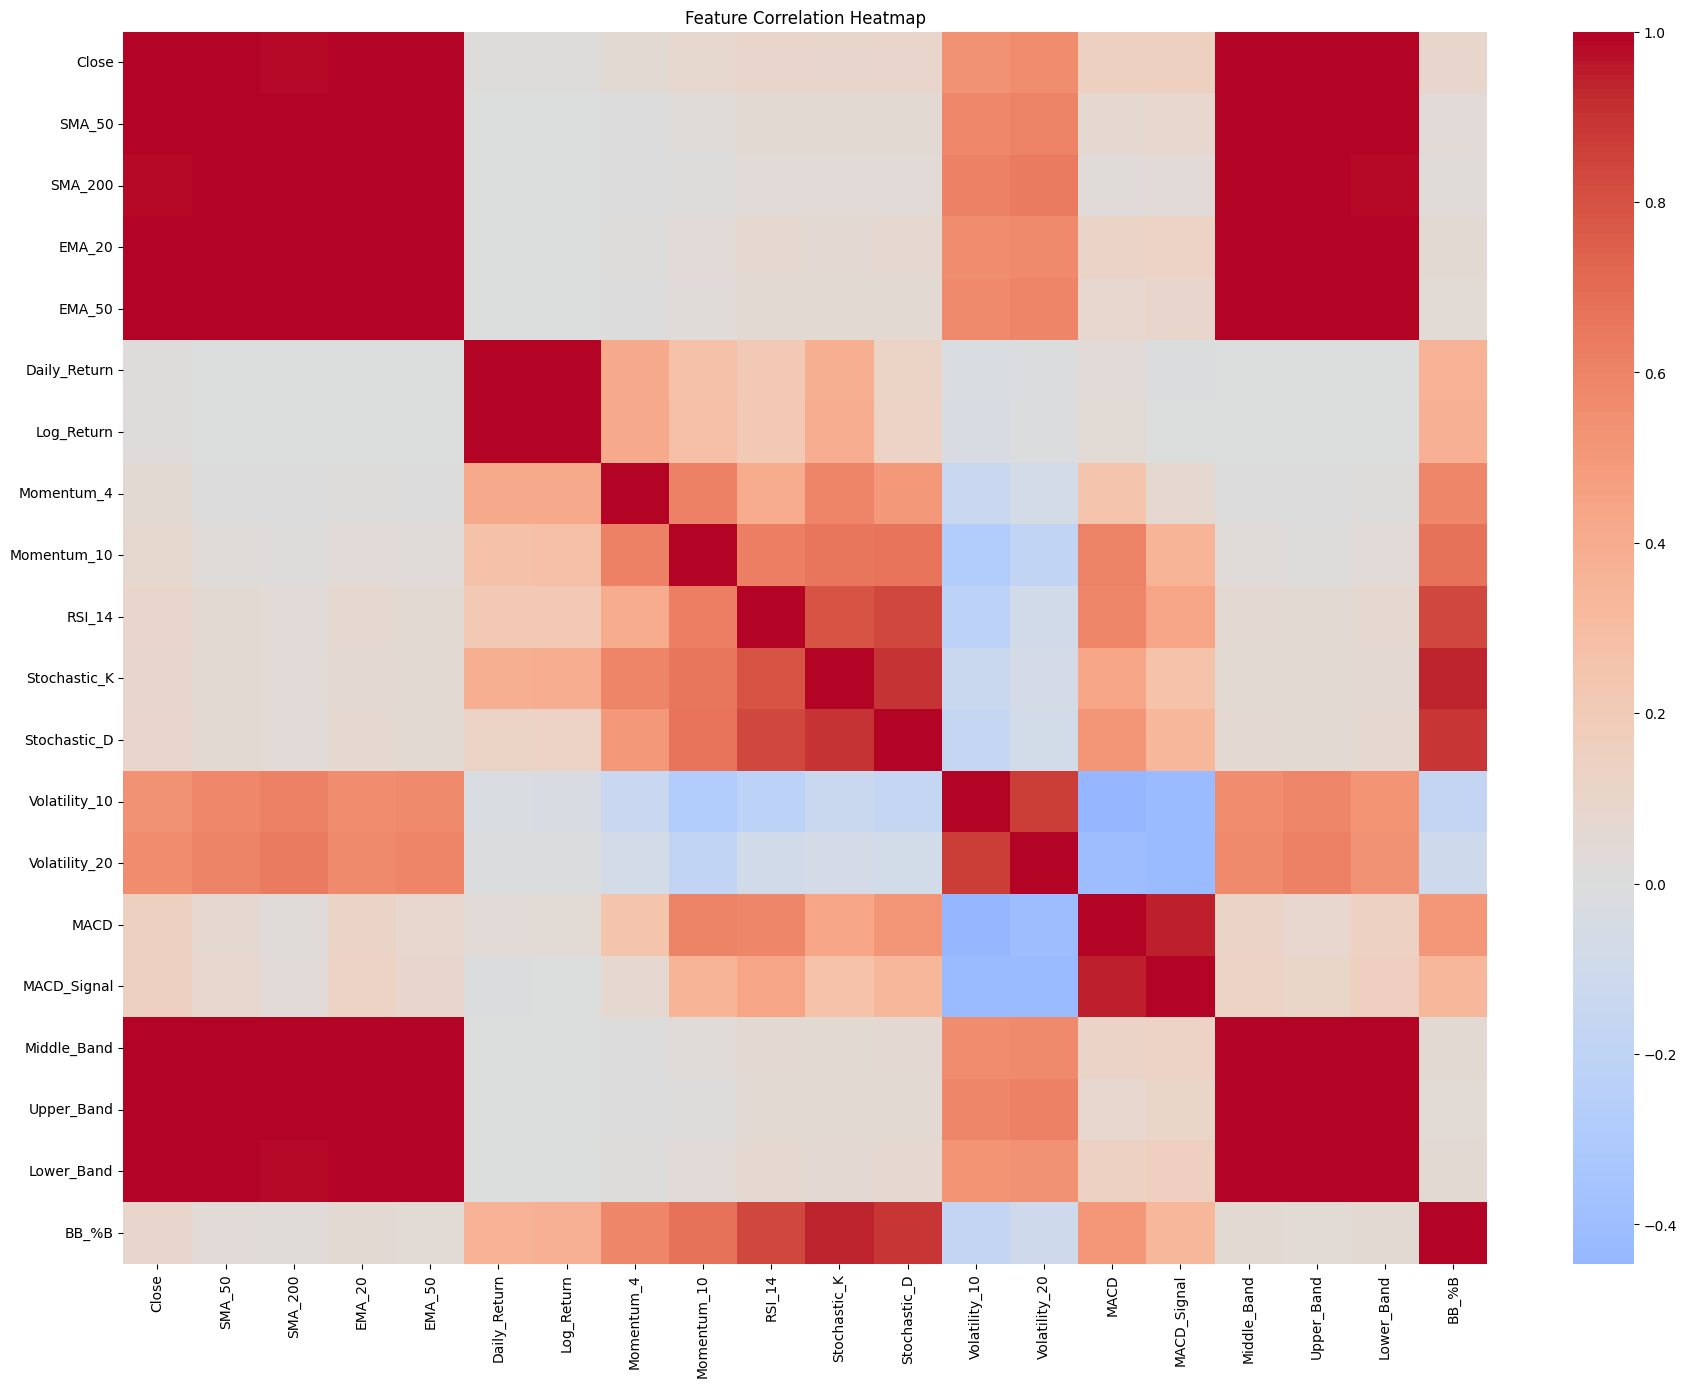

In [16]:
# ===============================
# Correlation Heatmap
# ===============================
plt.figure(figsize=(22, 16))
sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
# ===============================
# Highlighting the higly correlated features
# ===============================
FEATURE_COLS = ['Close',
                'SMA_50', 'SMA_200', 'EMA_20', 'EMA_50', 
                'Daily_Return', 'Log_Return', 'Momentum_4', 'Momentum_10',
                'RSI_14', 'Stochastic_K', 'Stochastic_D', 
                'Volatility_10', 'Volatility_20', 
                'MACD', 'MACD_Signal',
                'Middle_Band', 'Upper_Band', 'Lower_Band', 'BB_%B'
              ]

corr_matrix =X.corr().abs()
high_corr = np.where(corr_matrix > 0.95)  # threshold 0.95
high_corr_pairs = [(FEATURE_COLS[i], FEATURE_COLS[j]) for i, j in zip(*high_corr) if i != j and i < j]
print("Highly correlated pairs:", high_corr_pairs)

Highly correlated pairs: [('Close', 'SMA_50'), ('Close', 'SMA_200'), ('Close', 'EMA_20'), ('Close', 'EMA_50'), ('Close', 'Middle_Band'), ('Close', 'Upper_Band'), ('Close', 'Lower_Band'), ('SMA_50', 'SMA_200'), ('SMA_50', 'EMA_20'), ('SMA_50', 'EMA_50'), ('SMA_50', 'Middle_Band'), ('SMA_50', 'Upper_Band'), ('SMA_50', 'Lower_Band'), ('SMA_200', 'EMA_20'), ('SMA_200', 'EMA_50'), ('SMA_200', 'Middle_Band'), ('SMA_200', 'Upper_Band'), ('SMA_200', 'Lower_Band'), ('EMA_20', 'EMA_50'), ('EMA_20', 'Middle_Band'), ('EMA_20', 'Upper_Band'), ('EMA_20', 'Lower_Band'), ('EMA_50', 'Middle_Band'), ('EMA_50', 'Upper_Band'), ('EMA_50', 'Lower_Band'), ('Daily_Return', 'Log_Return'), ('Middle_Band', 'Upper_Band'), ('Middle_Band', 'Lower_Band'), ('Upper_Band', 'Lower_Band')]


In [18]:
# ===============================
# Removing those that contains the same information
# ===============================
df_ml = df_ml.drop(columns=['SMA_200', 'EMA_50',
                            'Volatility_20',
                            'MACD',
                            'Middle_Band', 'Lower_Band'
                            ])

In [19]:
# ===============================
# Prepare features and target variable for correlation heatmap
# ===============================
X = df_ml.drop(columns=["Date"], errors="ignore") # Features
y = df_ml["Close"] 

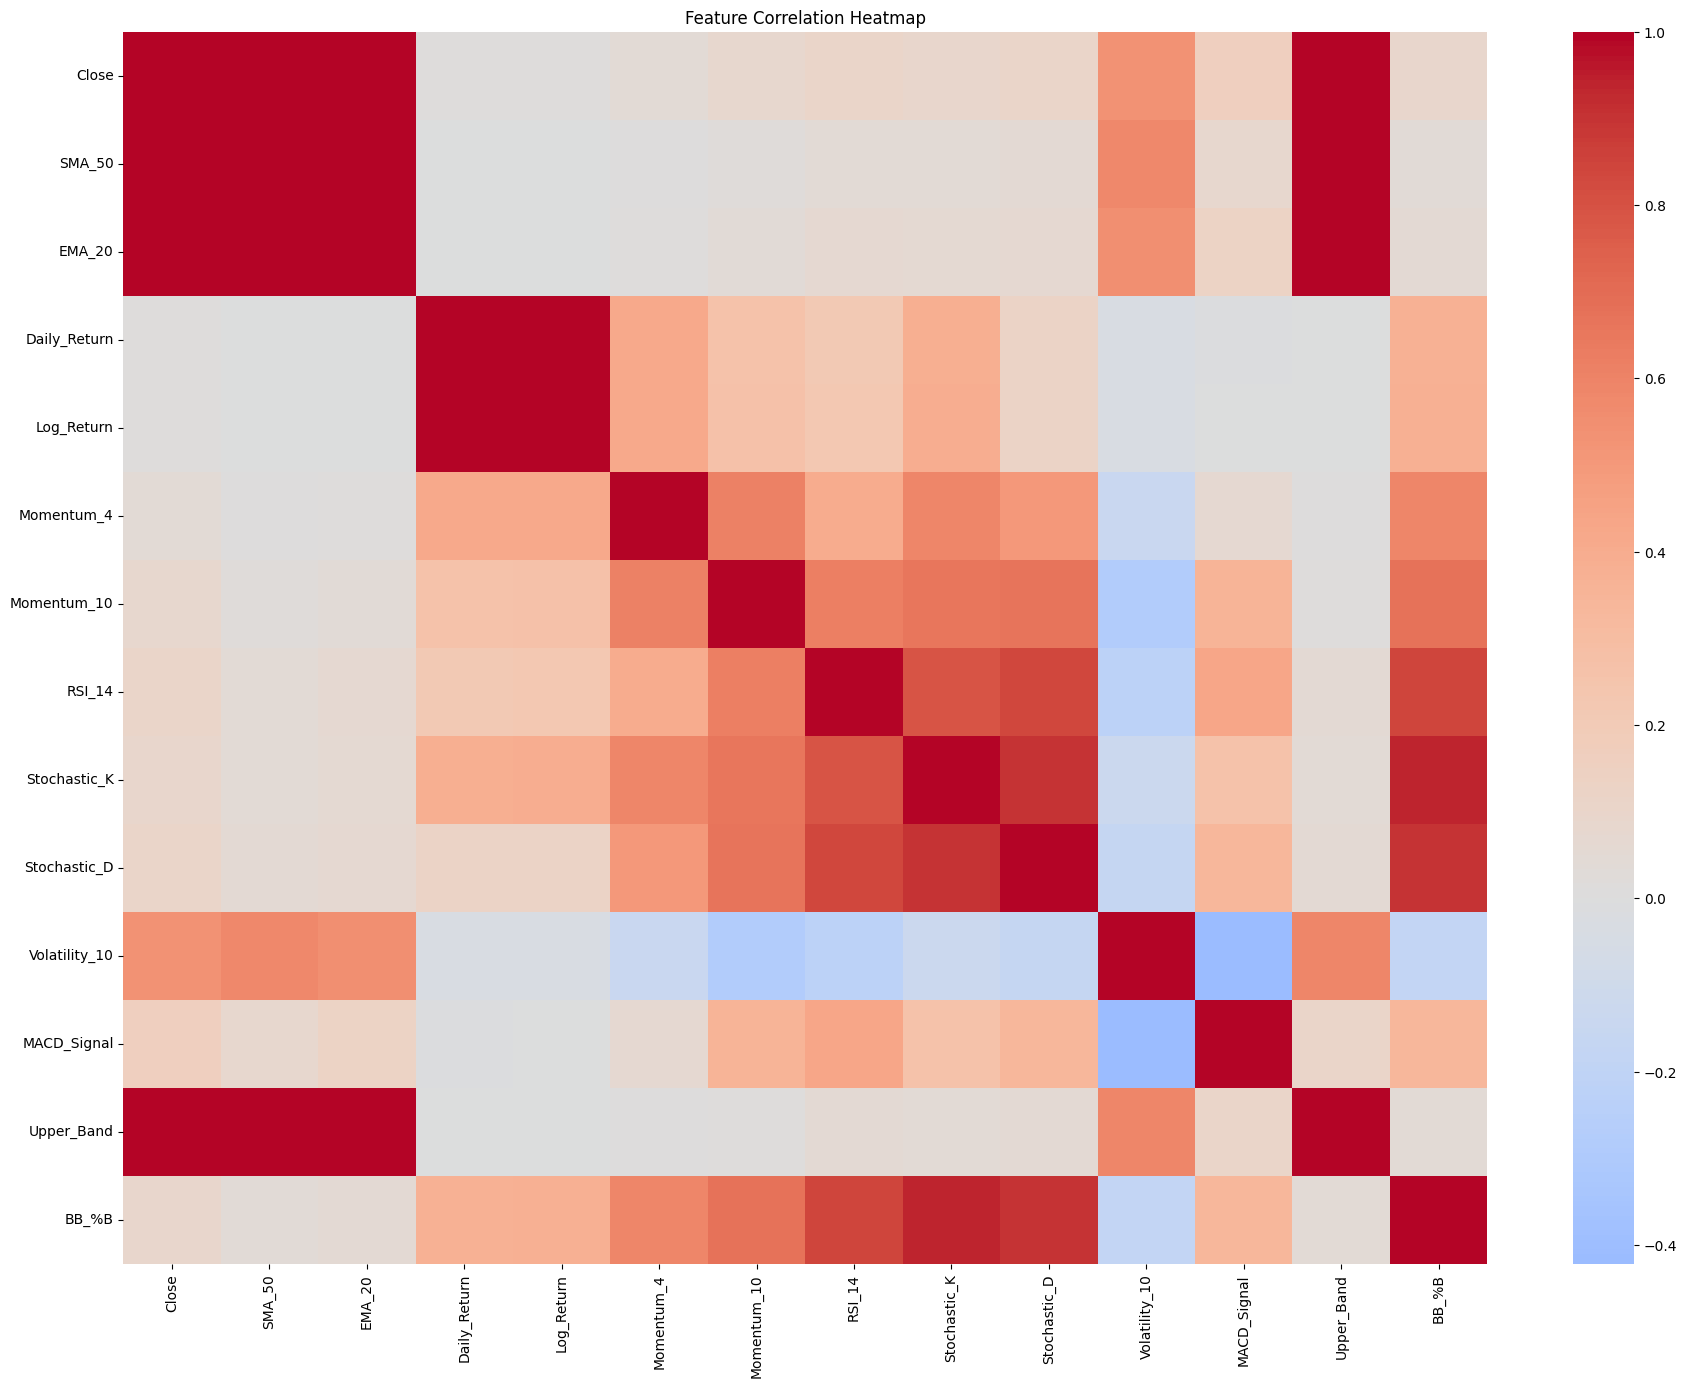

In [20]:
# ===============================
# Correlation Heatmap
# ===============================
plt.figure(figsize=(22, 16))
sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

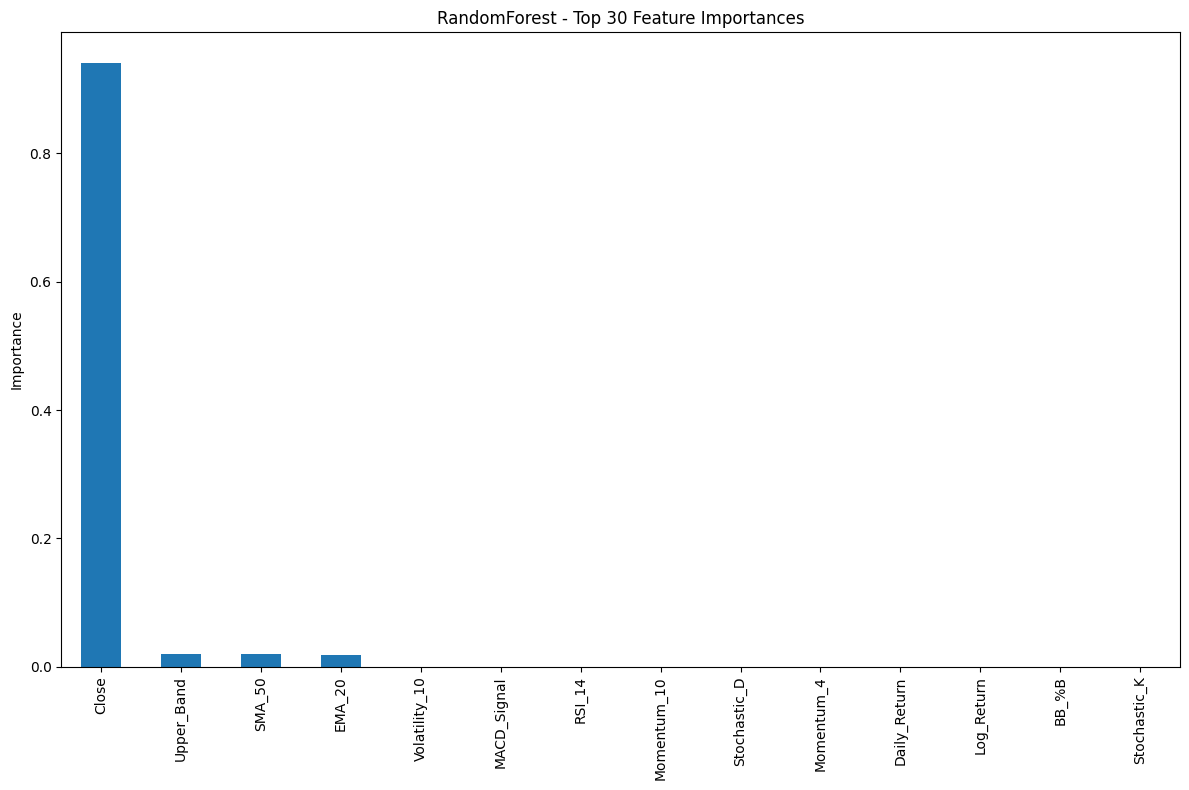

In [21]:
# ===============================
# Random Forest Feature Importances
# ===============================
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
importances.head(30).plot(kind="bar")
plt.title("RandomForest - Top 30 Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

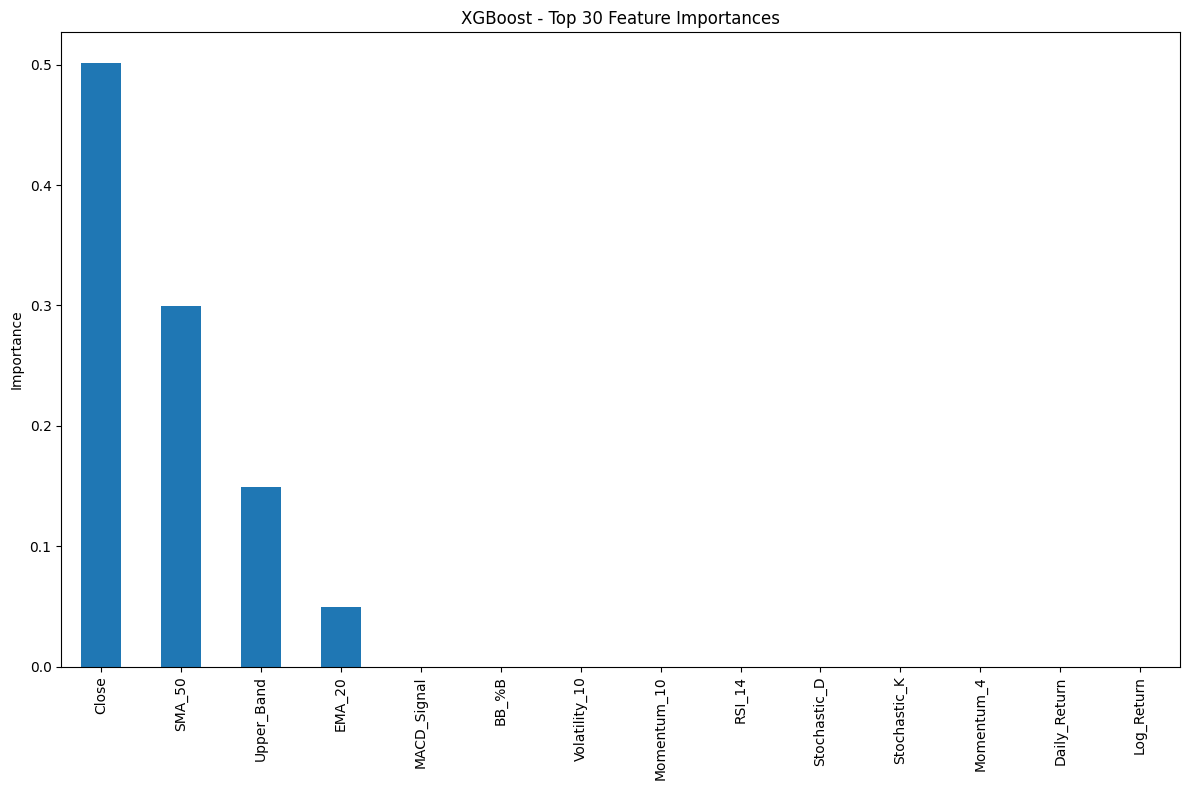

In [22]:
# ===============================
# XGBoost Feature Importances
# ===============================
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="reg:squarederror"
)

xgb.fit(X, y)

xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
xgb_importances.head(30).plot(kind="bar")
plt.title("XGBoost - Top 30 Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

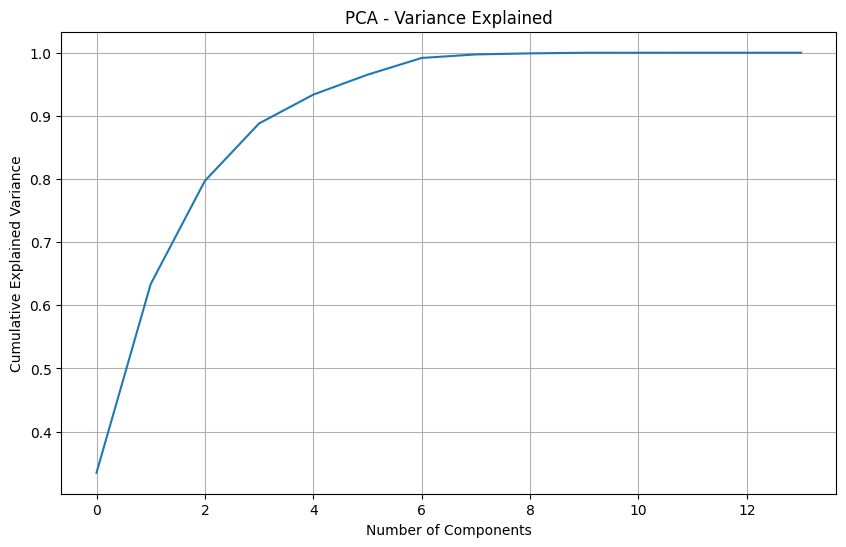

In [23]:
# ===============================
# PCA Variance Explained
# ===============================
pca = PCA()
pca.fit(X)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Variance Explained')
plt.grid(True)
plt.show()

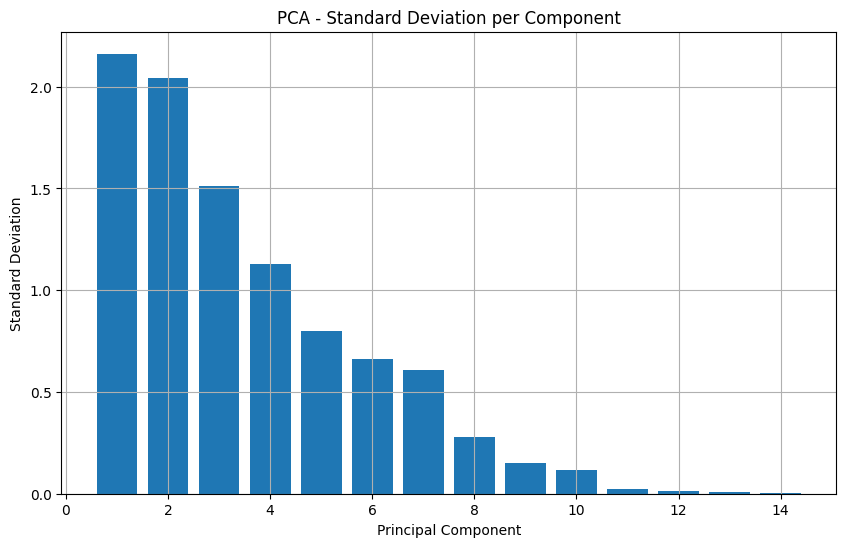

In [24]:
# ===============================
# PCA Variance Explained
# ===============================
explained_variance = pca.explained_variance_
std_dev = np.sqrt(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(std_dev) + 1), std_dev)
plt.xlabel('Principal Component')
plt.ylabel('Standard Deviation')
plt.title('PCA - Standard Deviation per Component')
plt.grid(True)
plt.show()

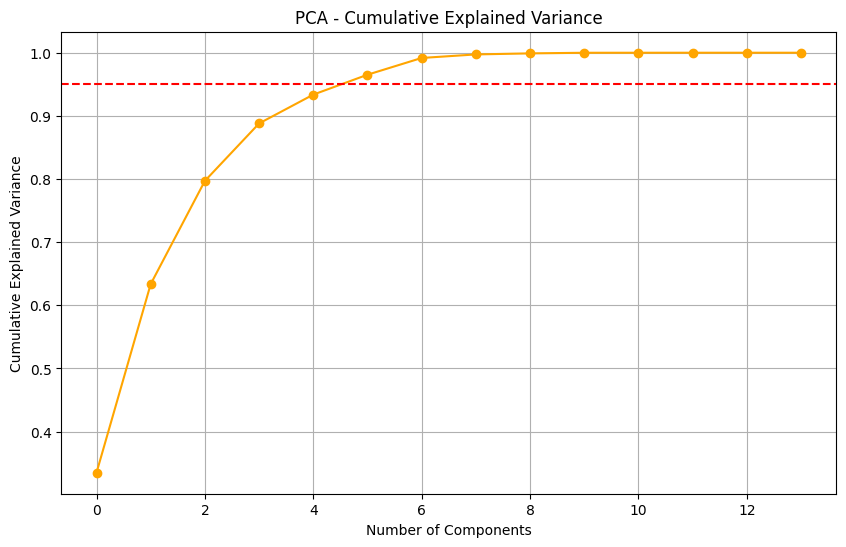

In [25]:
# ===============================
# PCA Variance Explained
# ===============================
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.axhline(y=0.95, color='r', linestyle='--')  # Draw a line at 95% variance
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

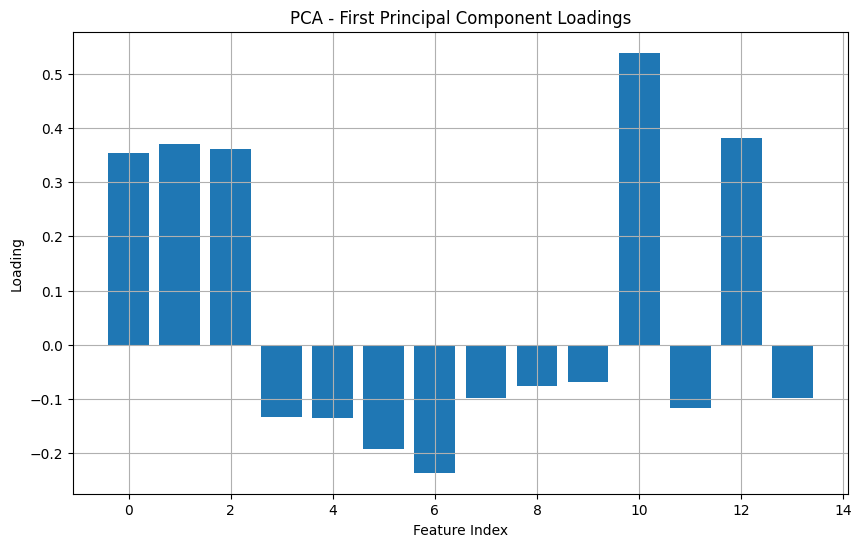

In [26]:
# ===============================
# PCA Principal components
# ===============================
components = pca.components_
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), components[0])
plt.xlabel('Feature Index')
plt.ylabel('Loading')
plt.title('PCA - First Principal Component Loadings')
plt.grid(True)
plt.show()

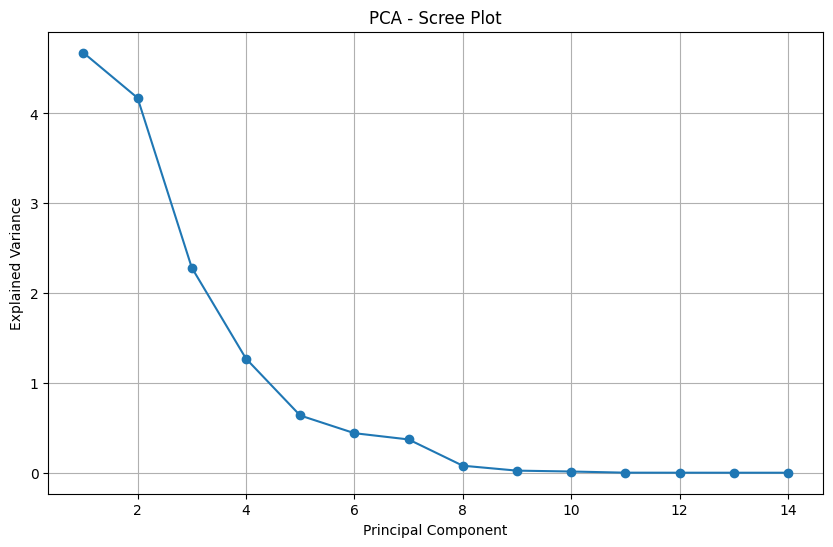

In [27]:
# ===============================
# Scree plot
# ===============================
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('PCA - Scree Plot')
plt.grid(True)
plt.show()

In [28]:
# ===============================
# Some hyperparameters for model training 
# ===============================
SEQ_LEN = 60           # input window (days)
PRED_HORIZON = 1       # predict 1 step ahead (next day), for multi-step, see recursive forecast
BATCH_SIZE = 64
EPOCHS = 10
VAL_SIZE = 0.1         # fraction for validation (time split used below)
TEST_SIZE = 0.1        # fraction for test (time split used below)

In [29]:
# ===============================
# Define features and targets
# ===============================
# Required inputs (assumptions)
FEATURE_COLS = ['Close', 
                'SMA_50', 'EMA_20', 
                'Daily_Return', 'Log_Return', 'Momentum_4', 'Momentum_10',
                'RSI_14', 'Stochastic_K', 'Stochastic_D', 
                'Volatility_10', 
                'MACD_Signal',
                'Upper_Band', 'BB_%B'
              ]
TARGET_COL = "Close"  # the model will predict this (1-step ahead)

In [30]:
# ===============================
# Build sequences
# ===============================
def build_sequences(df, feature_cols, target_col, seq_len=SEQ_LEN, pred_horizon=1):
    """
    Build X, y arrays for supervised learning.
    X shape: (N_samples, seq_len, n_features)
    y shape: (N_samples, pred_horizon)  # pred_horizon=1 gives (N,1)
    """
    data = df[feature_cols].to_numpy()
    target = df[target_col].to_numpy()

    N = len(df)
    X, y = [], []
    last_start = N - seq_len - pred_horizon + 1
    if last_start <= 0:
        raise ValueError("Not enough rows to build sequences. Reduce seq_len or pred_horizo")
    for i in range(last_start):
        X.append(data[i:i+seq_len])
        y.append(target[i+seq_len : i+seq_len+pred_horizon])
    X = np.array(X)
    y = np.array(y)
    # If pred_horizon==1, allow shape (N,) or (N,1) depending on downstream code. We'll keep (N, pred_horizon)
    return X, y

# Build sequences
X, y = build_sequences(df_ml, FEATURE_COLS, TARGET_COL, seq_len=SEQ_LEN, pred_horizon=PRED_HORIZON)
print("X.shape, y.shape =", X.shape, y.shape)

X.shape, y.shape = (6250, 60, 14) (6250, 1)


In [31]:
# ===============================
# Train/validation (time-ordered)
# ===============================
# Keep time ordering: first 80% train, 10% validation, last 10% test
n_samples = X.shape[0]
train_end = int((1 - VAL_SIZE - TEST_SIZE) * n_samples)
val_end = int((1 - TEST_SIZE) * n_samples)

X_train, X_val, X_test = X[:train_end], X[train_end:val_end], X[val_end:]
y_train, y_val, y_test = y[:train_end], y[train_end:val_end], y[val_end:]

print("Train samples:", X_train.shape, "Val samples:", X_val.shape[0], "Test samples:", X_test.shape[0])

Train samples: (5000, 60, 14) Val samples: 625 Test samples: 625


In [32]:
# ===============================
# Prepare Encoder-Decoder Data
# ===============================
def build_encoder_decoder_dataset(X, y, target_idx=0, dec_len=None):
    """
    Proper seq2seq dataset for time series Transformer

    X        : (N, seq_len, n_features)  → encoder input
    y        : (N,) or (N, 1)             → target (Close)
    target_idx : index of target in X
    """

    N, seq_len, n_features = X.shape
    if dec_len is None:
        dec_len = seq_len

    # Encoder input: full feature window
    X_enc = X.copy()   # (N, seq_len, n_features)

    # Decoder input: ONLY target, shifted (teacher forcing)
    X_dec = np.zeros((N, dec_len, 1), dtype=X.dtype)

    # Shift target by 1
    X_dec[:, 1:, 0] = X[:, :-1, target_idx]
    X_dec[:, 0, 0] = 0.0   # start token (or last known Close)

    # Target
    Y = y.reshape(-1, 1)   # (N, 1)

    return X_enc, X_dec, Y


# Build encoder-decoder dataset
X_enc_train, X_dec_train, Y_train = build_encoder_decoder_dataset(X_train, y_train, dec_len=SEQ_LEN)
X_enc_val, X_dec_val, Y_val = build_encoder_decoder_dataset(X_val, y_val, dec_len=SEQ_LEN)
X_enc_test, X_dec_test, Y_test = build_encoder_decoder_dataset(X_test, y_test, dec_len=SEQ_LEN)

In [33]:
# ===============================
# Attention Variants
# ===============================
class MultiQueryAttention(layers.Layer):
    """
    Multi-Query Attention: shared key/value projections across heads
    Supports a query, key, value interface like standard MultiHeadAttention 
    (compatible drop-in replacement for MultiHeadAttention)
    """
    def __init__(self, num_heads, key_dim):
        super().__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        self.supports_masking = True

        # Query gets separate projection for each head
        self.q_proj = layers.Dense(num_heads * key_dim)
        # Keys and Values shared across all heads
        self.k_proj = layers.Dense(key_dim)
        self.v_proj = layers.Dense(key_dim)
        # Final linear projection
        self.out = layers.Dense(num_heads * key_dim)

    def call(self, query, value=None, key=None, mask=None):
        """
        query: (B, Tq, d_model)
        key  : (B, Tk, d_model) or None
        value: (B, Tk, d_model) or None
        mask : (B, 1, Tq, Tk) optional
        """
        if key is None:
            key = query
        if value is None:
            value = query

        B = tf.shape(query)[0]
        Tq = tf.shape(query)[1]
        Tk = tf.shape(key)[1]
        
        # Linear projection (Project Q, K, V)
        q = self.q_proj(query)                  # (B, Tq, H*D)
        k = self.k_proj(key)                    # (B, Tk, D)
        v = self.v_proj(value)                  # (B, Tk, D)

        # Reshape Q into heads
        q = tf.reshape(q, (B, Tq, self.num_heads, self.key_dim))
        q = tf.transpose(q, [0, 2, 1, 3])       # (B, H, Tq, D)

        # Expand shared Keys and Values across heads
        k = k[:, None, :, :]                    # (B, 1, Tk, D)
        v = v[:, None, :, :]                    # (B, 1, Tk, D)

        # Scaled dot-product attention
        scores = tf.matmul(q, k, transpose_b=True)  # (B, H, Tq, Tk)
        scores /= tf.sqrt(tf.cast(self.key_dim, tf.float32))
        # Apply attention mask
        if mask is not None:
            scores += mask  # broadcasting works if mask is (B, 1, Tq, Tk)

        # Softmax over key dimension
        attn = tf.nn.softmax(scores, axis=-1)
        # Weighted sum
        out = tf.matmul(attn, v)                 # (B, H, Tq, D)

        # Restore shape
        out = tf.transpose(out, [0, 2, 1, 3])    # (B, Tq, H, D)
        out = tf.reshape(out, (B, Tq, self.num_heads * self.key_dim))

        # Final linear projection
        return self.out(out)

In [34]:
# ===============================
# Transformer Encoder Block
# ===============================
class EncoderBlock(layers.Layer):
    """
    One Transformer encoder block 

    Consists of:
    1. Multi-Head (or Multi-Query) Self-Attention
    2. Add & LayerNorm
    3. Feed-Forward Network (FFN)
    4. Add & LayerNorm
    """
    def __init__(self, d_model, num_heads, ff_dim, use_mqa=False):
        super().__init__()

        # Standard MHA or Multi-Query Attention
        if use_mqa:
            self.attn = MultiQueryAttention(num_heads=num_heads, key_dim=d_model // num_heads)
        else:
            self.attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model // num_heads)

        # Feed-forward network
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(d_model)
        ])

        # Two LayerNorms for stabilizing training
        self.norm1 = layers.LayerNormalization(epsilon=1e-6)
        self.norm2 = layers.LayerNormalization(epsilon=1e-6)
        # For residual dropout
        self.dropout1 = layers.Dropout(0.1)
        self.dropout2 = layers.Dropout(0.1)

    def call(self, x, mask=None, training=False):
        """
        x: (batch, seq_len, d_model)
        mask: (batch, 1, seq_len, seq_len) or None
        """
        # 1. SELF-ATTENTION
        # Self-attention
        if isinstance(self.attn, MultiQueryAttention):
            attn_out = self.attn(x, mask=mask)
        else:
            attn_out = self.attn(query=x, value=x, key=x, mask=mask)
        attn_out = self.dropout1(attn_out, training=training)
        # Residual connection + normalization
        x = self.norm1(x + attn_out)

        # 2. FEED FORWARD
        ffn_output = self.ffn(x)
        ffn_output = self.dropout2(ffn_output, training=training)
        # Residual + normalization
        return self.norm2(x + ffn_output)

In [35]:
# ===============================
# Decoder Block (masked + cross-attention)
# ===============================
class DecoderBlock(layers.Layer):
    """
    One Transformer decoder block

    Consists of:
    1. Causal masked self-attention
    2. Encoder-decoder cross-attention
    3. Feed-forward network
    """
    def __init__(self, d_model, num_heads, ff_dim, use_mqa=False):
        super().__init__()
        
        # Self-attention (causal mask applied) and Cross-attention (decoder queries, encoder keys)
        if use_mqa:
            self.self_attn = MultiQueryAttention(num_heads=num_heads, key_dim=d_model // num_heads)
            self.cross_attn = MultiQueryAttention(num_heads=num_heads, key_dim=d_model // num_heads)
        else:
            self.self_attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model // num_heads)
            self.cross_attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model // num_heads)

        # FFN
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(d_model)
        ])

        # LayerNorms
        self.norm1 = layers.LayerNormalization(epsilon=1e-6)
        self.norm2 = layers.LayerNormalization(epsilon=1e-6)
        self.norm3 = layers.LayerNormalization(epsilon=1e-6)
        # Dropouts
        self.dropout1 = layers.Dropout(0.1)
        self.dropout2 = layers.Dropout(0.1)
        self.dropout3 = layers.Dropout(0.1)

    def call(self, x, enc_out, causal_mask=None, training=False):
        """
        x       : decoder input (batch, dec_len, d_model)
        enc_out : encoder output  (batch, enc_len, d_model)
        causal_mask: prevents decoder from looking into the future
        """
        # Masked self-attention and Cross-attention
        if isinstance(self.self_attn, MultiQueryAttention):
            attn1 = self.self_attn(x, mask=causal_mask)
            attn2 = self.cross_attn(x, enc_out)
        else:
            attn1 = self.self_attn(query=x, value=x, key=x, mask=causal_mask)
            attn2 = self.cross_attn(query=x, value=enc_out, key=enc_out)
        attn1 = self.dropout1(attn1, training=training)
        x = self.norm1(x + attn1)
        attn2 = self.dropout2(attn2, training=training)
        x = self.norm2(x + attn2)

        # Feed-forward
        ffn_out = self.ffn(x)
        ffn_out = self.dropout3(ffn_out, training=training)

        # Final normalization
        x = self.norm3(x + ffn_out)
        return x

In [36]:
# ===============================
# Positional Encoding
# ===============================
def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, None]
    i = np.arange(d_model)[None, :]
    angle_rates = 1 / np.power(10000, (2*(i//2)) / np.float32(d_model))
    angle_rads = pos * angle_rates
    pe = np.zeros_like(angle_rads)
    pe[:, 0::2] = np.sin(angle_rads[:, 0::2])
    pe[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return tf.cast(pe[None, ...], tf.float32)   # shape (1, seq_len, d_model)

In [37]:
# ===============================
# Full Encoder-Decoder Transformer
# ===============================
class TransformerTimeSeries(tf.keras.Model):
    def __init__(self, enc_len, dec_len,
                 d_model=64, num_heads=4, ff_dim=128,
                 num_enc_layers=2, num_dec_layers=2,
                 use_mqa=False):
        super().__init__()

        #  Embeddings
        self.enc_embedding = layers.Dense(d_model)
        self.dec_embedding = layers.Dense(d_model)

        # Positional encoding
        self.enc_pos = positional_encoding(enc_len, d_model)
        self.dec_pos = positional_encoding(dec_len, d_model)

        # Encoder and decoder stacks
        self.encoder = [EncoderBlock(d_model, num_heads, ff_dim, use_mqa) for _ in range(num_enc_layers)]
        self.decoder = [DecoderBlock(d_model, num_heads, ff_dim, use_mqa) for _ in range(num_dec_layers)]

        self.out = layers.Dense(1)   # Final projection to 1 output per time step

    def causal_mask(self, seq_len):
        """
        Causal mask for decoder

        Creates a triangular causal mask so that
        position i can only attend to <= i
        """
        mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)   # Shape (1, 1, seq_len, seq_len)
        mask = mask * -1e9
        return mask[None, None, :, :]

    def call(self, inputs, training=False):
        encoder_input, decoder_input = inputs

        # ENCODER
        x = self.enc_embedding(encoder_input) + self.enc_pos
        for layer in self.encoder:
            x = layer(x, training=training)
        enc_out = x   # (B, enc_len, d_model)

        # DECODER
        y = self.dec_embedding(decoder_input) + self.dec_pos

        # Create causal mask
        mask = self.causal_mask(tf.shape(decoder_input)[1])
        for layer in self.decoder:
            y = layer(y, enc_out, causal_mask=mask, training=training)

        # Output prediction
        return self.out(y)[:, -1:, :]   # last step in sequence

In [38]:
# ===============================
# Model definition
# ===============================
model = TransformerTimeSeries(
    enc_len=SEQ_LEN,
    dec_len=SEQ_LEN,
    d_model=64,
    num_heads=4,
    ff_dim=128,
    num_enc_layers=2,
    num_dec_layers=2,
    use_mqa=True
)
model.compile(optimizer="adam", loss="mse")

In [39]:
# ===============================
# Training
# ===============================
history = model.fit(
    (X_enc_train, X_dec_train), Y_train,
    validation_data=((X_enc_val, X_dec_val), Y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 215ms/step - loss: 0.3611 - val_loss: 0.0196
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 177ms/step - loss: 0.0490 - val_loss: 0.0162
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - loss: 0.0266 - val_loss: 0.0444
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - loss: 0.0171 - val_loss: 0.0115
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0117 - val_loss: 0.0158
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - loss: 0.0091 - val_loss: 0.0134
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0080 - val_loss: 0.0227
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0063 - val_loss: 0.0365
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - loss: 0.0052 - val_loss: 0.0273
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 0.0055 - val_loss: 0.0096


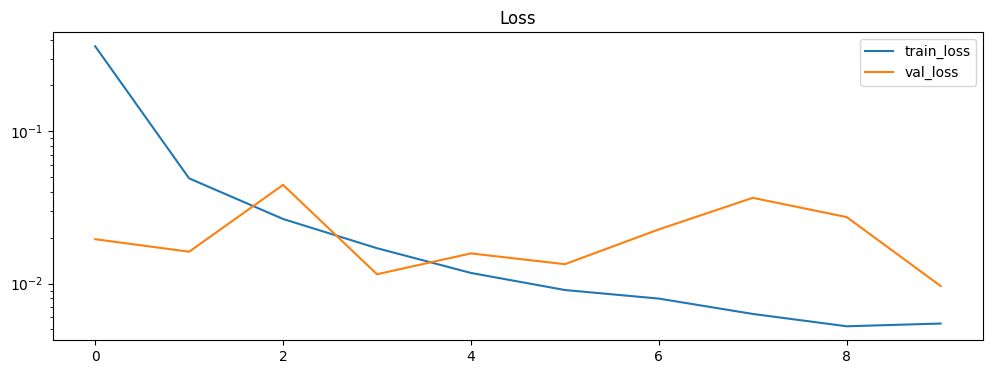

In [40]:
# ===============================
# Plot training loss & metrics
# ===============================
plt.figure(figsize=(12,4))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.yscale("log")
plt.legend(); plt.title("Loss"); plt.show()

In [41]:
X_train = (X_enc_train, X_dec_train)
X_val = (X_enc_val, X_dec_val)
X_test = (X_enc_test, X_dec_test)

In [42]:
print(X_test[0].shape, X_test[1].shape, Y_test.shape)

(625, 60, 14) (625, 60, 1) (625, 1)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


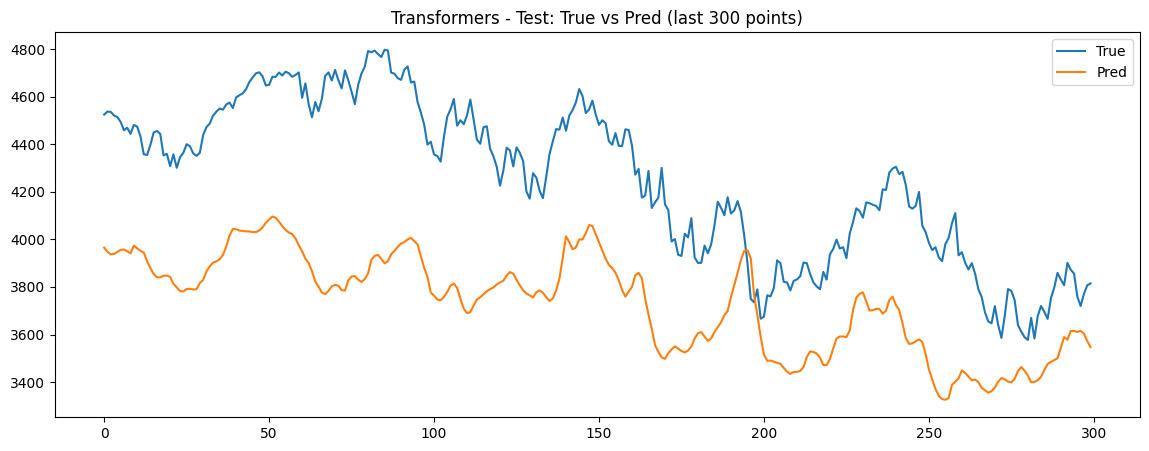

Test metrics (original units): {'MAE': 419.7395539048249, 'MSE': 213457.16938952066, 'RMSE': 462.01425236622373}


In [43]:
# ===============================
# Evaluate / Predictions (test)
# ===============================
# Predict (scaled)
y_test_pred_scaled = model.predict(X_test)  # shape (N_test, PRED_HORIZON)

# If you scaled the target 'Close' separately
try:
    y_test_pred = close_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
    y_test_true = close_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
except NameError:
    print("No target scaler found, keeping scaled values")
    y_test_pred = y_test_pred_scaled.flatten()
    y_test_true = y_test.flatten()


# Plot last N points
Nplot = min(300, len(y_test_true))
plt.figure(figsize=(14,5))
plt.plot(y_test_true[-Nplot:], label="True")
plt.plot(y_test_pred[-Nplot:], label="Pred")
plt.legend()
plt.title(f"Transformers - Test: True vs Pred (last {Nplot} points)")
plt.show()

# Compute metrics
def compute_metrics(true, pred):
    true = np.array(true).reshape(-1)
    pred = np.array(pred).reshape(-1)
    mae = np.mean(np.abs(true - pred))
    mse = np.mean((true - pred)**2)
    rmse_v = np.sqrt(mse)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse_v}

metrics_test = compute_metrics(y_test_true, y_test_pred)
print("Test metrics (original units):", metrics_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


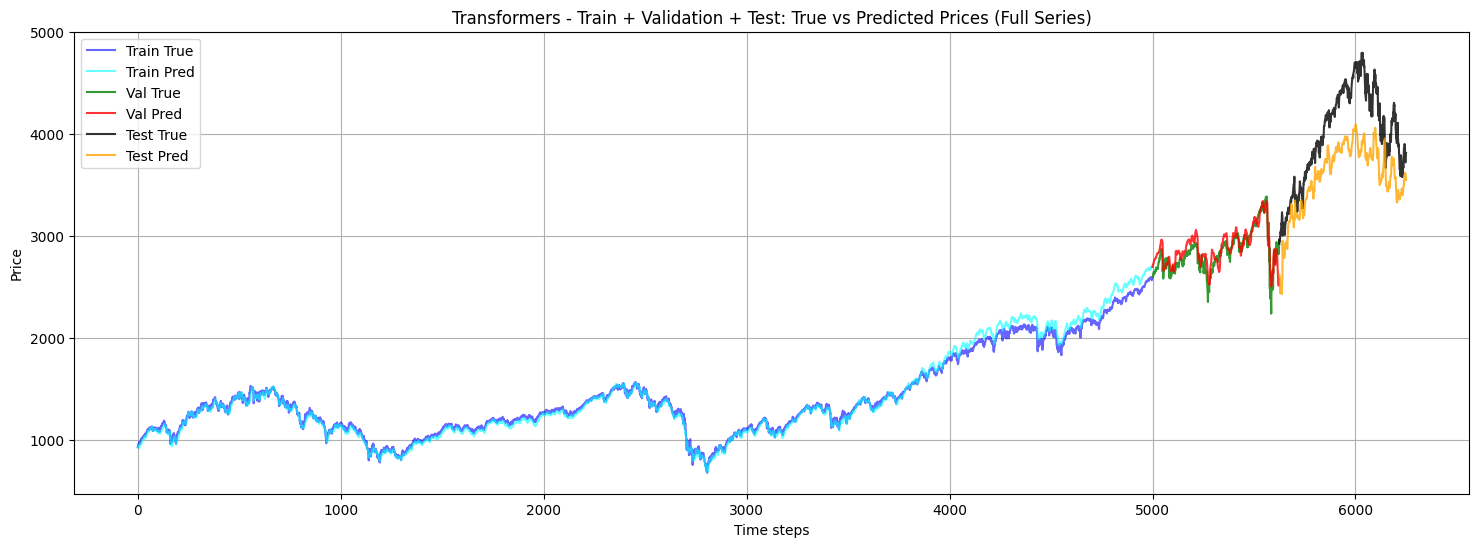

Training metrics (original units): {'MAE': 36.36945032054078, 'MSE': 2319.989727985491, 'RMSE': 48.16627168450441}
Validation metrics (original units): {'MAE': 75.633026168325, 'MSE': 9221.885421876832, 'RMSE': 96.03064834664417}
Test metrics (original units): {'MAE': 419.7395539048249, 'MSE': 213457.16938952066, 'RMSE': 462.01425236622373}


In [44]:
# ===============================
# Full series plot - Train + Validation + Test
# ===============================

# Predict scaled values for train and validation
y_train_pred_scaled = model.predict(X_train)
y_val_pred_scaled = model.predict(X_val)

# Inverse transform using the target scaler
try:
    y_train_pred = close_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
    y_train_true = close_scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

    y_val_pred = close_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).flatten()
    y_val_true = close_scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

    y_test_pred = close_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
    y_test_true = close_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
except NameError:
    print("No target scaler found, keeping scaled values")
    y_train_pred = y_train_pred_scaled.flatten()
    y_train_true = y_train.flatten()
    y_val_pred = y_val_pred_scaled.flatten()
    y_val_true = y_val.flatten()
    y_test_pred = y_test_pred_scaled.flatten()
    y_test_true = y_test.flatten()

# Plot the full series
plt.figure(figsize=(18,6))
plt.plot(y_train_true, label="Train True", color='blue', alpha=0.6)
plt.plot(y_train_pred, label="Train Pred", color='cyan', alpha=0.6)
plt.plot(range(len(y_train_true), len(y_train_true)+len(y_val_true)), y_val_true, label="Val True", color='green', alpha=0.8)
plt.plot(range(len(y_train_true), len(y_train_true)+len(y_val_true)), y_val_pred, label="Val Pred", color='red', alpha=0.8)
plt.plot(range(len(y_train_true)+len(y_val_true), len(y_train_true)+len(y_val_true)+len(y_test_true)), y_test_true, label="Test True", color='black', alpha=0.8)
plt.plot(range(len(y_train_true)+len(y_val_true), len(y_train_true)+len(y_val_true)+len(y_test_true)), y_test_pred, label="Test Pred", color='orange', alpha=0.8)
plt.xlabel("Time steps")
plt.ylabel("Price")
plt.title("Transformers - Train + Validation + Test: True vs Predicted Prices (Full Series)")
plt.legend()
plt.grid(True)
plt.show()

# Compute metrics
def compute_metrics(true, pred):
    true = np.array(true).reshape(-1)
    pred = np.array(pred).reshape(-1)
    mae = np.mean(np.abs(true - pred))
    mse = np.mean((true - pred)**2)
    rmse_v = np.sqrt(mse)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse_v}

metrics_train = compute_metrics(y_train_true, y_train_pred)
metrics_val = compute_metrics(y_val_true, y_val_pred)
metrics_test = compute_metrics(y_test_true, y_test_pred)

print("Training metrics (original units):", metrics_train)
print("Validation metrics (original units):", metrics_val)
print("Test metrics (original units):", metrics_test)

In [45]:
# ===============================
# Recursive multi-step forecast (future) by re-updating features at each step
# ===============================
def scale_features_row(df_row):
    df_scaled = df_row.copy()
    # Close
    df_scaled["Close"] = close_scaler.transform(df_row[["Close"]])
    # Price features
    df_scaled[price_cols] = prices_scaler.transform(df_row[price_cols])
    # Indicators
    for col, scaler in indicators_scalers.items():
        df_scaled[col] = scaler.transform(df_row[[col]])
    return df_scaled

def recursive_forecast_seq2seq(
    model,
    df_history,          # dataframe brut (NON scaled)
    last_enc_seq,        # (ENC_LEN, N_FEATURES) scaled
    last_dec_seq,        # (DEC_LEN, 1) scaled
    n_steps=200,
):
    enc_seq = last_enc_seq.copy()
    dec_seq = last_dec_seq.copy()

    preds = []
    df_hist = df_history.copy()

    for _ in range(n_steps):
        # Predict next Close (scaled)
        pred_close_scaled = model.predict([enc_seq[np.newaxis, ...], dec_seq[np.newaxis, ...]])[0, 0, 0]

        # Inverse scale Close
        pred_close = close_scaler.inverse_transform([[pred_close_scaled]])[0, 0]
        preds.append(pred_close)

        # Build next RAW row (OHLCV logic)
        last_row = df_hist.iloc[-1].copy()
        new_row = last_row.copy()

        new_row["Close"] = pred_close

        # 4. Append & recompute ALL features
        df_hist = df_history.copy()
        df_hist = pd.concat([df_hist, new_row.to_frame().T], ignore_index=True)
        df_hist = preprocess_data(df_hist)
        df_hist = df_hist.select_dtypes(include=[np.number]).dropna()
        df_hist = df_hist.replace([np.inf, -np.inf], np.nan)
        df_hist = df_hist.dropna()

        # 5. Take last row & scale it correctly
        df_scaled = scale_features_row(df_hist)
        last_features_scaled = df_scaled.iloc[-1:][FEATURE_COLS]

        # 6. ENCODER lide window
        enc_seq = np.vstack([enc_seq[1:], last_features_scaled.values])

        # 7. Slide DECODER window (autoregressive)
        dec_seq = np.vstack([dec_seq[1:], [[pred_close_scaled]]])

    return np.array(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tomcuel/.venvs/global_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


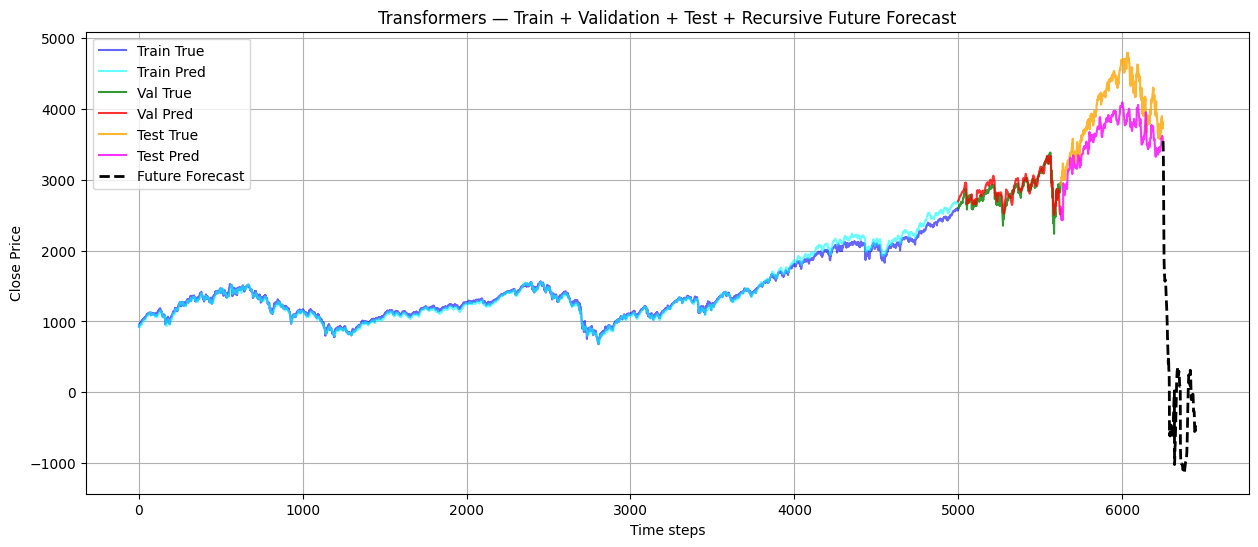

In [46]:
# ===============================
# Recursive multi-step forecast (future) by re-updating features at each step
# ===============================
# future forecast
N_FUTURE = 200
future_preds = recursive_forecast_seq2seq(
    model=model,
    df_history=df_raw_hist,
    last_enc_seq=X_enc_test[-1],
    last_dec_seq=X_dec_test[-1],
    n_steps=N_FUTURE
)

# Predict scaled values
y_train_pred_scaled = model.predict(X_train)
y_val_pred_scaled   = model.predict(X_val)
y_test_pred_scaled  = model.predict(X_test)

# Inverse transform
y_train_pred = close_scaler.inverse_transform(y_train_pred_scaled.reshape(-1,1)).flatten()
y_train_true = close_scaler.inverse_transform(y_train.reshape(-1,1)).flatten()

y_val_pred = close_scaler.inverse_transform(y_val_pred_scaled.reshape(-1,1)).flatten()
y_val_true = close_scaler.inverse_transform(y_val.reshape(-1,1)).flatten()

y_test_pred = close_scaler.inverse_transform(y_test_pred_scaled.reshape(-1,1)).flatten()
y_test_true = close_scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

# Plot
plt.figure(figsize=(15,6))

# Train
plt.plot(range(len(y_train_true)), y_train_true, label="Train True", color="blue", alpha=0.6)
plt.plot(range(len(y_train_pred)), y_train_pred, label="Train Pred", color="cyan", alpha=0.6)

# Validation
val_x = range(len(y_train_true), len(y_train_true) + len(y_val_true))
plt.plot(val_x, y_val_true, label="Val True", color="green", alpha=0.8)
plt.plot(val_x, y_val_pred, label="Val Pred", color="red", alpha=0.8)

# Test
test_x = range(len(y_train_true) + len(y_val_true), len(y_train_true) + len(y_val_true) + len(y_test_true))
plt.plot(test_x, y_test_true, label="Test True", color="orange", alpha=0.8)
plt.plot(test_x, y_test_pred, label="Test Pred", color="magenta", alpha=0.8)

# Future
future_x = range(len(y_train_true) + len(y_val_true) + len(y_test_true), len(y_train_true) + len(y_val_true) + len(y_test_true) + N_FUTURE)
plt.plot(future_x, future_preds, label="Future Forecast", color="black", linestyle="--", linewidth=2)

plt.xlabel("Time steps")
plt.ylabel("Close Price")
plt.title("Transformers — Train + Validation + Test + Recursive Future Forecast")
plt.legend()
plt.grid(True)
plt.show()